# Analyzing Player Performances

In [155]:
#Importing Libraries
import numpy as np #To handle Mathematical calculations
import matplotlib.pyplot as plt #To plot charts 
%matplotlib inline
import pandas as pd #TO import and manage datasets
import glob
import os

In [156]:
# path = r'C:\Projects\FYP\Datasets\Whoscored\Player-Stats' # use your path
path = r'/Users/suwadith/Desktop/Projects/FYP/Datasets/Whoscored/Player-Stats' # use your path
folder = glob.glob(path + "/*Offensive*.csv")

li = []

for file in folder:
#     df = pd.read_csv(filename, index_col=None, header=0)
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
    
    li.append(individualOffensivePlayerDataframe)

# combinedDataframe = pd.concat(li, axis=0, ignore_index=True)
combinedOffensivePlayerDataframe = pd.concat(li)

# dataset = pd.read_csv('C:\Projects\FYP\Datasets\Whoscored\Points-Table\LaLiga-Points-Table-2018-2019.csv')
# league = 'LaLiga'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


In [157]:
combinedOffensivePlayerDataframe.head()

,Name,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,Fouled per game,Offsides per game,Dispossessed per game,Bad control per game,Rating,League,Season
0,Riyad Mahrez,Leicester,25,AM(CLR),36(1),3058,17,11,2.3,1.8,3.5,2.2,0.1,2.4,2.1,7.84,PremierLeague,2015
1,Dimitri Payet,West Ham,29,M(CLR),29(1),2573,9,12,2.3,4,2.2,1.3,0.1,1.7,1.8,7.74,PremierLeague,2015
2,Alexis Sánchez,Arsenal,27,"M(CLR),FW",28(2),2446,13,4,3.6,2.1,3.4,2.2,0.4,3.3,2.4,7.72,PremierLeague,2015
3,Mousa Dembélé,Tottenham,28,M(CR),27(2),2273,3,1,0.8,1,2.9,1.1,0.1,2.2,0.8,7.69,PremierLeague,2015
4,Mesut Özil,Arsenal,27,M(CLR),35,3049,6,19,1.4,4.2,1.3,1.2,0.4,1.7,2,7.66,PremierLeague,2015


In [158]:
combinedOffensivePlayerDataframe.shape

(30061, 18)

In [159]:
combinedOffensivePlayerDataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30061 entries, 0 to 543
Data columns (total 18 columns):
Name                     30061 non-null object
Team                     30061 non-null object
Age                      30061 non-null int64
Position                 30061 non-null object
Apps                     30061 non-null object
Minutes                  30061 non-null int64
Total goals              30061 non-null object
Total Assists            30061 non-null object
Shots per game           30061 non-null object
Key passes per game      30061 non-null object
Dribbles per game        30061 non-null object
Fouled per game          30061 non-null object
Offsides per game        30061 non-null object
Dispossessed per game    30061 non-null object
Bad control per game     30061 non-null object
Rating                   30061 non-null float64
League                   30061 non-null object
Season                   30061 non-null object
dtypes: float64(1), int64(2), object(15)
memory 

In [160]:
laligaOffensivePlayerDf = combinedOffensivePlayerDataframe.loc[combinedOffensivePlayerDataframe['League'] == 'LaLiga']
bundesligaOffensivePlayerDf = combinedOffensivePlayerDataframe.loc[combinedOffensivePlayerDataframe['League'] == 'Bundesliga']
ligue1OffensivePlayerDf = combinedOffensivePlayerDataframe.loc[combinedOffensivePlayerDataframe['League'] == 'Ligue1']
serieaOffensivePlayerDf = combinedOffensivePlayerDataframe.loc[combinedOffensivePlayerDataframe['League'] == 'SerieA']
eplOffensivePlayerDf = combinedOffensivePlayerDataframe.loc[combinedOffensivePlayerDataframe['League'] == 'PremierLeague']

In [161]:
laligaOffensivePlayerDf

,Name,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,Fouled per game,Offsides per game,Dispossessed per game,Bad control per game,Rating,League,Season
0,Lionel Messi,Barcelona,29,"AM(CR),FW",31(2),2730,26,16,4.8,2.3,3.5,1.8,0.3,2.2,0.9,8.46,LaLiga,2015
1,Neymar,Barcelona,24,"AM(CLR),FW",34,3057,24,12,3.6,3,4.2,3.8,0.7,2.7,2.3,8.43,LaLiga,2015
2,Gareth Bale,Real Madrid,26,"M(CLR),FW",21(2),1741,19,10,3.5,2.2,1.8,1.2,0.7,0.8,1.3,8.12,LaLiga,2015
3,Luis Suárez,Barcelona,29,"AM(CLR),FW",35,3150,40,16,3.9,1.6,1.2,1.7,1.7,1.2,2,8.00,LaLiga,2015
4,Cristiano Ronaldo,Real Madrid,31,"M(L),FW",36,3185,35,11,6.3,1.4,1.4,1.1,1.4,1.2,1.2,7.99,LaLiga,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,Javi Poves,Sporting Gijon,24,Defender,0(1),11,-,-,-,-,-,-,-,2,-,5.95,LaLiga,2010
551,Cala,Malaga,21,Midfielder,0(1),22,-,-,-,-,-,-,-,-,-,5.87,LaLiga,2010
552,Dionisio Villalba,Deportivo La Coruna,21,Forward,0(1),23,-,-,-,-,-,-,-,1,2,5.85,LaLiga,2010
553,David Timor,Osasuna,21,"D(C),M(C)",0(1),10,-,-,-,-,-,-,-,-,-,5.84,LaLiga,2010


In [162]:
laliga2018OffensivePlayerDf = laligaOffensivePlayerDf.loc[laligaOffensivePlayerDf['Season'] == '2018']

In [163]:
laliga2018OffensivePlayerDf

,Name,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,Fouled per game,Offsides per game,Dispossessed per game,Bad control per game,Rating,League,Season
0,Lionel Messi,Barcelona,32,"AM(CR),FW",29(5),2710,36,13,5,2.7,3.9,1.9,0.5,2.3,1.9,8.48,LaLiga,2018
1,Alex Sola,Real Sociedad,20,Defender,1,90,-,-,2,1,4,2,-,2,2,8.03,LaLiga,2018
2,Luis Suárez,Barcelona,32,"AM(CLR),FW",31(2),2830,21,6,3.4,1.4,1.1,1.7,0.8,1.6,2.3,7.57,LaLiga,2018
3,Iago Aspas,Celta Vigo,31,"AM(CR),FW",26(1),2262,20,6,2.6,2.1,0.7,1.6,0.3,1.3,1.1,7.51,LaLiga,2018
4,Daniel Parejo,Valencia,30,M(C),35(1),3063,9,7,1.2,2.3,1,1.5,-,0.6,0.9,7.40,LaLiga,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,Ivi,Real Valladolid,25,AM(L),0(3),17,-,-,0.3,-,-,-,-,0.3,1,5.94,LaLiga,2018
540,Alexander Szymanowski,Leganes,30,AM(L),0(1),9,-,-,-,-,-,-,-,-,1,5.92,LaLiga,2018
541,Franco Di Santo,Rayo Vallecano,30,"AM(CLR),FW",1(5),170,-,-,-,-,0.2,0.7,0.3,-,0.7,5.91,LaLiga,2018
542,Axel Werner,SD Huesca,23,GK,6,540,-,-,-,-,-,-,-,-,-,5.87,LaLiga,2018


In [164]:
messiDf = laligaOffensivePlayerDf.loc[laligaOffensivePlayerDf['Name'] == 'Lionel Messi']

In [165]:
messiDf

,Name,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,Fouled per game,Offsides per game,Dispossessed per game,Bad control per game,Rating,League,Season
0,Lionel Messi,Barcelona,29,"AM(CR),FW",31(2),2730,26,16,4.8,2.3,3.5,1.8,0.3,2.2,0.9,8.46,LaLiga,2015
0,Lionel Messi,Barcelona,28,"AM(CR),FW",37(1),3375,43,18,4.9,2.5,4.6,2.4,0.6,2,1.3,8.84,LaLiga,2014
0,Lionel Messi,Barcelona,23,"AM(CR),FW",30(5),2841,34,10,4.7,1.9,4.1,2.4,0.3,2.5,-,8.67,LaLiga,2009
0,Lionel Messi,Barcelona,27,"AM(CR),FW",29(2),2508,27,11,5,2.4,4.6,1.5,0.5,2.2,0.8,8.34,LaLiga,2013
0,Lionel Messi,Barcelona,26,"AM(CR),FW",28(4),2644,46,12,5.1,1.4,3.8,2.3,0.5,2.6,1.3,8.83,LaLiga,2012
0,Lionel Messi,Barcelona,31,"AM(CR),FW",32(4),2997,34,12,5.5,2.4,5.1,2.2,0.4,3,1.4,8.68,LaLiga,2017
1,Lionel Messi,Barcelona,30,"AM(CR),FW",32(2),2833,37,9,5.3,2.3,3.7,2.3,0.1,2.6,1.4,8.47,LaLiga,2016
0,Lionel Messi,Barcelona,32,"AM(CR),FW",29(5),2710,36,13,5,2.7,3.9,1.9,0.5,2.3,1.9,8.48,LaLiga,2018
0,Lionel Messi,Barcelona,25,"AM(CR),FW",36(1),3268,50,16,5.5,2.5,4.8,2.2,0.7,2.6,1.6,8.88,LaLiga,2011
1,Lionel Messi,Barcelona,24,"AM(CR),FW",31(2),2859,31,18,4.5,2,5.6,1.7,0.5,2.9,1.8,8.76,LaLiga,2010


In [166]:
messiDf = messiDf.replace('-', '0', regex=True)
# messiDf = messiDf.astype(np.float64)

In [167]:
messiDf

,Name,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,Fouled per game,Offsides per game,Dispossessed per game,Bad control per game,Rating,League,Season
0,Lionel Messi,Barcelona,29,"AM(CR),FW",31(2),2730,26,16,4.8,2.3,3.5,1.8,0.3,2.2,0.9,8.46,LaLiga,2015
0,Lionel Messi,Barcelona,28,"AM(CR),FW",37(1),3375,43,18,4.9,2.5,4.6,2.4,0.6,2,1.3,8.84,LaLiga,2014
0,Lionel Messi,Barcelona,23,"AM(CR),FW",30(5),2841,34,10,4.7,1.9,4.1,2.4,0.3,2.5,0,8.67,LaLiga,2009
0,Lionel Messi,Barcelona,27,"AM(CR),FW",29(2),2508,27,11,5,2.4,4.6,1.5,0.5,2.2,0.8,8.34,LaLiga,2013
0,Lionel Messi,Barcelona,26,"AM(CR),FW",28(4),2644,46,12,5.1,1.4,3.8,2.3,0.5,2.6,1.3,8.83,LaLiga,2012
0,Lionel Messi,Barcelona,31,"AM(CR),FW",32(4),2997,34,12,5.5,2.4,5.1,2.2,0.4,3,1.4,8.68,LaLiga,2017
1,Lionel Messi,Barcelona,30,"AM(CR),FW",32(2),2833,37,9,5.3,2.3,3.7,2.3,0.1,2.6,1.4,8.47,LaLiga,2016
0,Lionel Messi,Barcelona,32,"AM(CR),FW",29(5),2710,36,13,5,2.7,3.9,1.9,0.5,2.3,1.9,8.48,LaLiga,2018
0,Lionel Messi,Barcelona,25,"AM(CR),FW",36(1),3268,50,16,5.5,2.5,4.8,2.2,0.7,2.6,1.6,8.88,LaLiga,2011
1,Lionel Messi,Barcelona,24,"AM(CR),FW",31(2),2859,31,18,4.5,2,5.6,1.7,0.5,2.9,1.8,8.76,LaLiga,2010


Text(0, 0.5, 'Rating')

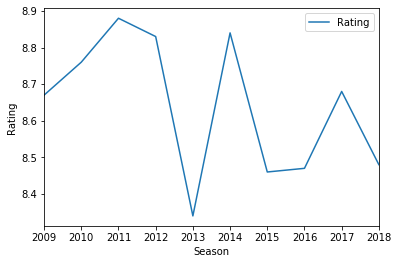

In [168]:
messiDf = messiDf.sort_values('Season')

messiDf.plot('Season', 'Rating')
plt.xlabel('Season')
plt.ylabel('Rating')

In [169]:
import statsmodels.api as sm
import seaborn as sns

In [170]:
messiDf.head()

,Name,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,Fouled per game,Offsides per game,Dispossessed per game,Bad control per game,Rating,League,Season
0,Lionel Messi,Barcelona,23,"AM(CR),FW",30(5),2841,34,10,4.7,1.9,4.1,2.4,0.3,2.5,0,8.67,LaLiga,2009
1,Lionel Messi,Barcelona,24,"AM(CR),FW",31(2),2859,31,18,4.5,2,5.6,1.7,0.5,2.9,1.8,8.76,LaLiga,2010
0,Lionel Messi,Barcelona,25,"AM(CR),FW",36(1),3268,50,16,5.5,2.5,4.8,2.2,0.7,2.6,1.6,8.88,LaLiga,2011
0,Lionel Messi,Barcelona,26,"AM(CR),FW",28(4),2644,46,12,5.1,1.4,3.8,2.3,0.5,2.6,1.3,8.83,LaLiga,2012
0,Lionel Messi,Barcelona,27,"AM(CR),FW",29(2),2508,27,11,5,2.4,4.6,1.5,0.5,2.2,0.8,8.34,LaLiga,2013


In [171]:
# messiDf.drop(['Team', 'Age', ''], axis=1)
list(messiDf.columns) 

['Name',
 'Team',
 'Age',
 'Position',
 'Apps',
 'Minutes',
 'Total goals',
 'Total Assists',
 'Shots per game',
 'Key passes per game',
 'Dribbles per game',
 'Fouled per game',
 'Offsides per game',
 'Dispossessed per game',
 'Bad control per game',
 'Rating',
 'League',
 'Season']

In [172]:
messiDf.drop([
 'Team',
 'Age',
 'Position',
 'Apps',
 'Minutes',
 'Total goals',
 'Total Assists',
 'Shots per game',
 'Key passes per game',
 'Dribbles per game',
 'Fouled per game',
 'Offsides per game',
 'Dispossessed per game',
 'Bad control per game',
 'League'], axis=1)

,Name,Rating,Season
0,Lionel Messi,8.67,2009
1,Lionel Messi,8.76,2010
0,Lionel Messi,8.88,2011
0,Lionel Messi,8.83,2012
0,Lionel Messi,8.34,2013
0,Lionel Messi,8.84,2014
0,Lionel Messi,8.46,2015
1,Lionel Messi,8.47,2016
0,Lionel Messi,8.68,2017
0,Lionel Messi,8.48,2018


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 0
Data columns (total 18 columns):
Name                     10 non-null object
Team                     10 non-null object
Age                      10 non-null int64
Position                 10 non-null object
Apps                     10 non-null object
Minutes                  10 non-null int64
Total goals              10 non-null object
Total Assists            10 non-null object
Shots per game           10 non-null object
Key passes per game      10 non-null object
Dribbles per game        10 non-null object
Fouled per game          10 non-null object
Offsides per game        10 non-null object
Dispossessed per game    10 non-null object
Bad control per game     10 non-null object
Rating                   10 non-null float64
League                   10 non-null object
Season                   10 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(14)
memory usage: 1.5+ KB


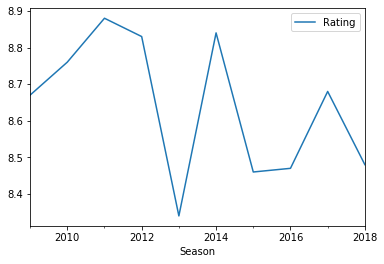

In [173]:
# messiDf['Rating'] = messiDf['Rating'].astype(np.float64)
messiDf['Season'] = pd.to_datetime(messiDf['Season'], format = '%Y')
messiDf.info()
messiDf.plot.line(x = 'Season', y = 'Rating')
plt.show()

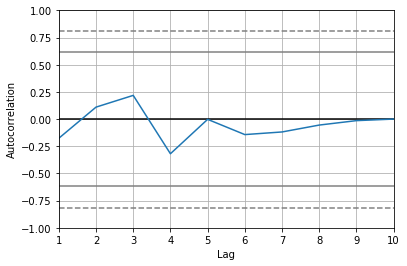

In [174]:
pd.plotting.autocorrelation_plot(messiDf['Rating'])
plt.show()

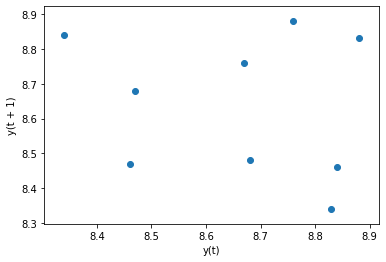

In [175]:
pd.plotting.lag_plot(messiDf['Rating'])
plt.show()

In [176]:
messiDf = messiDf.set_index('Season')

In [177]:
mod = sm.tsa.SARIMAX(messiDf['Rating'])
results = mod.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                 Rating   No. Observations:                   10
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  -5.117
Date:                Wed, 04 Mar 2020   AIC                             14.234
Time:                        12:59:09   BIC                             14.839
Sample:                    01-01-2009   HQIC                            13.570
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9994      0.011     91.607      0.000       0.978       1.021
sigma2         0.0826      0.048      1.733      0.083      -0.011       0.176
Ljung-Box (Q):                         nan   Jarque-

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


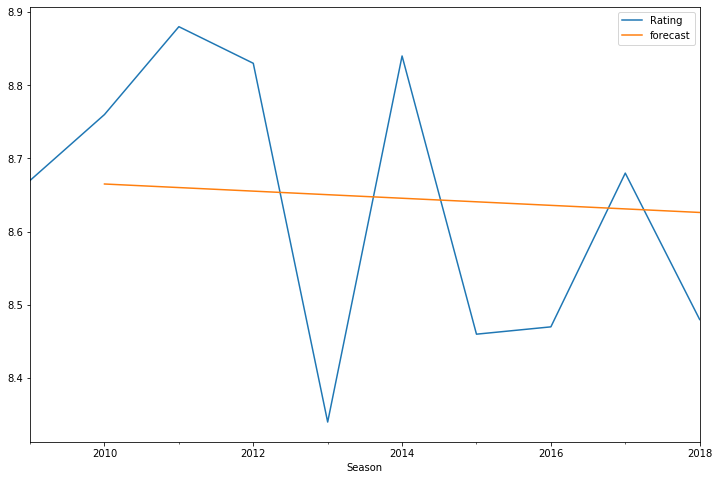

In [178]:
messiDf['forecast'] = results.predict(start = 1, end= 10, dynamic= True)  
messiDf[['Rating', 'forecast']].plot(figsize=(12, 8))
plt.show()

In [179]:
def forcasting_future_months(df, no_of_seasons):
    df = messiDf
    df_perdict = df.reset_index()
    sea = df_perdict['Season']
    sea = sea + pd.DateOffset(years = no_of_seasons)
    future_dates = sea[-no_of_seasons -1:]
    df_perdict = df_perdict.set_index('Season')
    future = pd.DataFrame(index=future_dates, columns= df_perdict.columns)
    df_perdict = pd.concat([df_perdict, future])
    df_perdict['forecast'] = results.predict(start = 1 , end = 15, dynamic= True)  
    df_perdict[['Rating', 'forecast']].iloc[-no_of_seasons - 12:].plot(figsize=(12, 8))
    plt.show()
    return df_perdict[-no_of_seasons:]

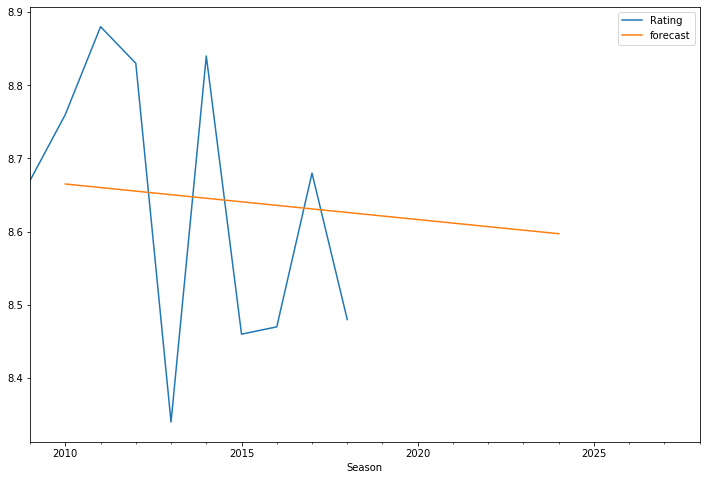

In [180]:
predicted = forcasting_future_months(messiDf,10)

In [181]:
messiDf

,Name,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,Fouled per game,Offsides per game,Dispossessed per game,Bad control per game,Rating,League,forecast
Season,,,,,,,,,,,,,,,,,,
2009-01-01,Lionel Messi,Barcelona,23,"AM(CR),FW",30(5),2841,34,10,4.7,1.9,4.1,2.4,0.3,2.5,0,8.67,LaLiga,NaN
2010-01-01,Lionel Messi,Barcelona,24,"AM(CR),FW",31(2),2859,31,18,4.5,2,5.6,1.7,0.5,2.9,1.8,8.76,LaLiga,8.665129
2011-01-01,Lionel Messi,Barcelona,25,"AM(CR),FW",36(1),3268,50,16,5.5,2.5,4.8,2.2,0.7,2.6,1.6,8.88,LaLiga,8.660261
2012-01-01,Lionel Messi,Barcelona,26,"AM(CR),FW",28(4),2644,46,12,5.1,1.4,3.8,2.3,0.5,2.6,1.3,8.83,LaLiga,8.655396
2013-01-01,Lionel Messi,Barcelona,27,"AM(CR),FW",29(2),2508,27,11,5,2.4,4.6,1.5,0.5,2.2,0.8,8.34,LaLiga,8.650533
2014-01-01,Lionel Messi,Barcelona,28,"AM(CR),FW",37(1),3375,43,18,4.9,2.5,4.6,2.4,0.6,2,1.3,8.84,LaLiga,8.645674
2015-01-01,Lionel Messi,Barcelona,29,"AM(CR),FW",31(2),2730,26,16,4.8,2.3,3.5,1.8,0.3,2.2,0.9,8.46,LaLiga,8.640817
2016-01-01,Lionel Messi,Barcelona,30,"AM(CR),FW",32(2),2833,37,9,5.3,2.3,3.7,2.3,0.1,2.6,1.4,8.47,LaLiga,8.635962
2017-01-01,Lionel Messi,Barcelona,31,"AM(CR),FW",32(4),2997,34,12,5.5,2.4,5.1,2.2,0.4,3,1.4,8.68,LaLiga,8.631111


In [182]:
laligaOffensivePlayerDf

,Name,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,Fouled per game,Offsides per game,Dispossessed per game,Bad control per game,Rating,League,Season
0,Lionel Messi,Barcelona,29,"AM(CR),FW",31(2),2730,26,16,4.8,2.3,3.5,1.8,0.3,2.2,0.9,8.46,LaLiga,2015
1,Neymar,Barcelona,24,"AM(CLR),FW",34,3057,24,12,3.6,3,4.2,3.8,0.7,2.7,2.3,8.43,LaLiga,2015
2,Gareth Bale,Real Madrid,26,"M(CLR),FW",21(2),1741,19,10,3.5,2.2,1.8,1.2,0.7,0.8,1.3,8.12,LaLiga,2015
3,Luis Suárez,Barcelona,29,"AM(CLR),FW",35,3150,40,16,3.9,1.6,1.2,1.7,1.7,1.2,2,8.00,LaLiga,2015
4,Cristiano Ronaldo,Real Madrid,31,"M(L),FW",36,3185,35,11,6.3,1.4,1.4,1.1,1.4,1.2,1.2,7.99,LaLiga,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,Javi Poves,Sporting Gijon,24,Defender,0(1),11,-,-,-,-,-,-,-,2,-,5.95,LaLiga,2010
551,Cala,Malaga,21,Midfielder,0(1),22,-,-,-,-,-,-,-,-,-,5.87,LaLiga,2010
552,Dionisio Villalba,Deportivo La Coruna,21,Forward,0(1),23,-,-,-,-,-,-,-,1,2,5.85,LaLiga,2010
553,David Timor,Osasuna,21,"D(C),M(C)",0(1),10,-,-,-,-,-,-,-,-,-,5.84,LaLiga,2010


In [183]:
namedGroup = laligaOffensivePlayerDf.groupby("Name")

In [184]:
namedGroup.first()

,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,Fouled per game,Offsides per game,Dispossessed per game,Bad control per game,Rating,League,Season
Name,,,,,,,,,,,,,,,,,
Aarón Martín,Espanyol,21,D(L),31(1),2815,-,-,0.2,1,1.1,0.6,-,0.8,0.7,6.76,LaLiga,2017
Aarón Ñíguez,Elche,26,AM(L),15(6),1177,-,1,1.4,0.6,1,1.4,0.1,1.1,1,6.61,LaLiga,2014
Abdelaziz Barrada,Getafe,24,M(CR),30(2),2591,4,6,1.3,1.9,1.5,2,0.1,2.2,1.5,7.07,LaLiga,2012
Abdelkader Ghezzal,Levante,27,FW,9(7),854,2,2,1.3,0.5,0.7,0.8,0.8,0.7,0.9,6.66,LaLiga,2011
Abdoul Sissoko,Granada,25,"D(C),M(CL)",10(1),767,-,-,0.4,0.5,0.2,1.2,0.3,0.6,0.5,6.53,LaLiga,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Óscar Rodríguez,Leganes,21,AM(C),29(2),2515,4,3,2,1.5,1.2,0.9,0.1,1.1,1.9,6.90,LaLiga,2018
Óscar Romero,Deportivo Alaves,25,"AM(CLR),FW",2(3),248,-,-,1.6,1,0.4,2,-,1.2,1.8,6.35,LaLiga,2017
Óscar Serrano,Racing Santander,28,"AM(CL),FW",27(6),2194,3,3,1,0.8,0.4,0.9,0.5,0.9,-,6.49,LaLiga,2009


In [185]:
namedGroup.get_group("Lionel Messi")

,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,Fouled per game,Offsides per game,Dispossessed per game,Bad control per game,Rating,League,Season
0,Barcelona,29,"AM(CR),FW",31(2),2730,26,16,4.8,2.3,3.5,1.8,0.3,2.2,0.9,8.46,LaLiga,2015
0,Barcelona,28,"AM(CR),FW",37(1),3375,43,18,4.9,2.5,4.6,2.4,0.6,2,1.3,8.84,LaLiga,2014
0,Barcelona,23,"AM(CR),FW",30(5),2841,34,10,4.7,1.9,4.1,2.4,0.3,2.5,-,8.67,LaLiga,2009
0,Barcelona,27,"AM(CR),FW",29(2),2508,27,11,5,2.4,4.6,1.5,0.5,2.2,0.8,8.34,LaLiga,2013
0,Barcelona,26,"AM(CR),FW",28(4),2644,46,12,5.1,1.4,3.8,2.3,0.5,2.6,1.3,8.83,LaLiga,2012
0,Barcelona,31,"AM(CR),FW",32(4),2997,34,12,5.5,2.4,5.1,2.2,0.4,3,1.4,8.68,LaLiga,2017
1,Barcelona,30,"AM(CR),FW",32(2),2833,37,9,5.3,2.3,3.7,2.3,0.1,2.6,1.4,8.47,LaLiga,2016
0,Barcelona,32,"AM(CR),FW",29(5),2710,36,13,5,2.7,3.9,1.9,0.5,2.3,1.9,8.48,LaLiga,2018
0,Barcelona,25,"AM(CR),FW",36(1),3268,50,16,5.5,2.5,4.8,2.2,0.7,2.6,1.6,8.88,LaLiga,2011
1,Barcelona,24,"AM(CR),FW",31(2),2859,31,18,4.5,2,5.6,1.7,0.5,2.9,1.8,8.76,LaLiga,2010


In [186]:
namedGroupp = laligaOffensivePlayerDf.groupby(['Team', 'Position'])

In [187]:
namedGroupp.first()

Name  Age    Apps  Minutes Total goals  \
Team    Position                                                         
Almeria AM(C),FW               Rodri   24   21(6)     1895           8   
        AM(CLR),FW              Suso   20   26(7)     2265           3   
        AM(LR)      Wellington Silva   22   23(8)     1991           -   
        AM(LR),FW           Jonathan   26  16(11)     1554           2   
        D(C)        Mauro Dos Santos   25   27(2)     2299           1   
...                              ...  ...     ...      ...         ...   
Xerez   GK                     Renan   25      35     3150           -   
        Goalkeeper             Chema   30       3      270           -   
        M(C)        Álex Bergantiños   25   22(4)     1992           -   
        M(R)            Carlos Calvo   24   26(9)     2142           4   
        Midfielder   Emilio Viqueira   35   4(13)      675           -   

                   Total Assists Shots per game Key passes per game  \
Team    Position                                                      
Almeria AM(C),FW               2            1.5                 0.3   
        AM(CLR),FW             7            1.9                   1   
        AM(LR)                 2            0.7                 0.7   
        AM(LR),FW              1            1.3                 0.8   
        D(C)                   -            0.4                 0.1   
...                          ...            ...                 ...   
Xerez   GK                     -              -                   -   
        Goalkeeper             -              -                   -   
        M(C)                   2            0.5                 0.7   
        M(R)                   1            0.9                 0.8   
        Midfielder             -            0.5                 0.8   

                   Dribbles per game Fouled per game Offsides per game  \
Team    Position                                                         
Almeria AM(C),FW                 0.4               2               1.2   
        AM(CLR),FW               1.7               1               0.1   
        AM(LR)                   2.4             2.3               0.1   
        AM(LR),FW                0.9               1               0.3   
        D(C)                       -             0.8                 -   
...                              ...             ...               ...   
Xerez   GK                         -             0.1                 -   
        Goalkeeper                 -             0.7                 -   
        M(C)                     0.3             0.8                 -   
        M(R)                     1.1             1.6               0.7   
        Midfielder               0.2             0.2                 -   

                   Dispossessed per game Bad control per game  Rating  League  \
Team    Position                                                                
Almeria AM(C),FW                       2                  1.3    6.55  LaLiga   
        AM(CLR),FW                   1.6                  1.2    6.81  LaLiga   
        AM(LR)                       0.9                    1    6.78  LaLiga   
        AM(LR),FW                    1.5                  1.6    6.53  LaLiga   
        D(C)                         0.1                  0.3    6.68  LaLiga   
...                                  ...                  ...     ...     ...   
Xerez   GK                             -                    -    6.84  LaLiga   
        Goalkeeper                     -                    -    7.65  LaLiga   
        M(C)                         0.9                    -    6.70  LaLiga   
        M(R)                         2.2                    -    6.53  LaLiga   
        Midfielder                   0.5                    -    6.31  LaLiga   

                   Season  
Team    Position           
Almeria AM(C),FW     2013  
        AM(CLR),FW   2013  
        AM(LR)  

In [219]:
ratingDf = laligaOffensivePlayerDf.pivot_table(index=['Name', 'Team'], columns='Season',
                     values=['Rating', 'Age'], aggfunc='first').reset_index()

In [220]:
laligaOffensivePlayerDf

,Name,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,Dribbles per game,Fouled per game,Offsides per game,Dispossessed per game,Bad control per game,Rating,League,Season
0,Lionel Messi,Barcelona,29,"AM(CR),FW",31(2),2730,26,16,4.8,2.3,3.5,1.8,0.3,2.2,0.9,8.46,LaLiga,2015
1,Neymar,Barcelona,24,"AM(CLR),FW",34,3057,24,12,3.6,3,4.2,3.8,0.7,2.7,2.3,8.43,LaLiga,2015
2,Gareth Bale,Real Madrid,26,"M(CLR),FW",21(2),1741,19,10,3.5,2.2,1.8,1.2,0.7,0.8,1.3,8.12,LaLiga,2015
3,Luis Suárez,Barcelona,29,"AM(CLR),FW",35,3150,40,16,3.9,1.6,1.2,1.7,1.7,1.2,2,8.00,LaLiga,2015
4,Cristiano Ronaldo,Real Madrid,31,"M(L),FW",36,3185,35,11,6.3,1.4,1.4,1.1,1.4,1.2,1.2,7.99,LaLiga,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,Javi Poves,Sporting Gijon,24,Defender,0(1),11,-,-,-,-,-,-,-,2,-,5.95,LaLiga,2010
551,Cala,Malaga,21,Midfielder,0(1),22,-,-,-,-,-,-,-,-,-,5.87,LaLiga,2010
552,Dionisio Villalba,Deportivo La Coruna,21,Forward,0(1),23,-,-,-,-,-,-,-,1,2,5.85,LaLiga,2010
553,David Timor,Osasuna,21,"D(C),M(C)",0(1),10,-,-,-,-,-,-,-,-,-,5.84,LaLiga,2010


In [221]:
ratingDf.loc[ratingDf['Team'] == 'Barcelona']

Name       Team   Age                                \
Season                                 2009  2010  2011  2012  2013  2014   
15               Abel Ruiz  Barcelona   NaN   NaN   NaN   NaN   NaN   NaN   
23            Adama Traoré  Barcelona   NaN   NaN   NaN   NaN  18.0   NaN   
30                 Adriano  Barcelona   NaN  26.0  27.0  28.0  29.0  30.0   
103            Aleix Vidal  Barcelona   NaN   NaN   NaN   NaN   NaN   NaN   
138         Alexandre Song  Barcelona   NaN   NaN   NaN  25.0  26.0   NaN   
...                    ...        ...   ...   ...   ...   ...   ...   ...   
2759                  Xavi  Barcelona  30.0  31.0  32.0  33.0  34.0  35.0   
2779            Yaya Touré  Barcelona  27.0   NaN   NaN   NaN   NaN   NaN   
2781            Yerry Mina  Barcelona   NaN   NaN   NaN   NaN   NaN   NaN   
2801    Zlatan Ibrahimovic  Barcelona  28.0   NaN   NaN   NaN   NaN   NaN   
2816          Álex Collado  Barcelona   NaN   NaN   NaN   NaN   NaN   NaN   

                    ... Rating                                            \
Season  2015  2016  ...   2009  2010  2011  2012  2013  2014  2015  2016   
15       NaN   NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
23       NaN   NaN  ...    NaN   NaN   NaN   NaN  6.62   NaN   NaN   NaN   
30      31.0   NaN  ...    NaN  6.98  7.13  7.20  7.26  7.11  6.68   NaN   
103     26.0  27.0  ...    NaN   NaN   NaN   NaN   NaN   NaN  6.76  7.34   
138      NaN   NaN  ...    NaN   NaN   NaN  7.14  6.85   NaN   NaN   NaN   
...      ...   ...  ...    ...   ...   ...   ...   ...   ...   ...   ...   
2759     NaN   NaN  ...   7.67  7.58  7.41  7.18  7.06  7.11   NaN   NaN   
2779     NaN   NaN  ...   7.28   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2781     NaN   NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2801     NaN   NaN  ...   7.48   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2816     NaN   NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                    
Season  2017  2018  
15       NaN  6.66  
23       NaN   NaN  
30       NaN   NaN  
103     6.36   NaN  
138      NaN   NaN  
...      ...   ...  
2759     NaN   NaN  
2779     NaN   NaN  
2781    6.89   NaN  
2801     NaN   NaN  
2816     NaN  5.96  

[85 rows x 22 columns]

In [236]:
allOffensiveRatingDf = combinedOffensivePlayerDataframe.pivot_table(index=['Name'], columns=['Season'],
                     values=['Rating', 'Age', 'Team'], aggfunc='first').reset_index()

In [237]:
allOffensiveRatingDf

Name   Age                                            \
Season                        2009  2010  2011  2012  2013  2014  2015  2016   
0            Aaron Cresswell   NaN   NaN   NaN   NaN   NaN  25.0  26.0  27.0   
1               Aaron Hughes  30.0  31.0  32.0  33.0  34.0   NaN   NaN   NaN   
2                 Aaron Hunt  23.0  24.0  25.0  26.0  27.0  28.0  29.0  30.0   
3               Aaron Lennon  23.0  24.0  25.0  26.0  27.0  28.0  29.0  30.0   
4           Aaron Leya Iseka   NaN   NaN   NaN   NaN   NaN   NaN   NaN  19.0   
...                      ...   ...   ...   ...   ...   ...   ...   ...   ...   
9146    Ögmundur Kristinsson   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9147             Ömer Toprak  20.0  21.0  22.0  23.0  24.0  25.0  26.0  27.0   
9148          Özkan Yildirim   NaN   NaN   NaN  20.0  21.0  22.0  23.0   NaN   
9149            Ørjan Nyland   NaN   NaN   NaN   NaN   NaN   NaN  25.0  26.0   
9150            Ümit Korkmaz  24.0  25.0   NaN   NaN   NaN   NaN   NaN   NaN   

              ...                 Team                                         \
Season  2017  ...                 2009                 2010              2011   
0       28.0  ...                  NaN                  NaN               NaN   
1        NaN  ...               Fulham               Fulham            Fulham   
2       31.0  ...        Werder Bremen        Werder Bremen     Werder Bremen   
3       31.0  ...            Tottenham            Tottenham         Tottenham   
4        NaN  ...                  NaN                  NaN               NaN   
...      ...  ...                  ...                  ...               ...   
9146    29.0  ...                  NaN                  NaN               NaN   
9147    28.0  ...             Freiburg             Freiburg  Bayer Leverkusen   
9148     NaN  ...                  NaN                  NaN               NaN   
9149     NaN  ...                  NaN                  NaN               NaN   
9150     NaN  ...  Eintracht Frankfurt  Eintracht Frankfurt               NaN   

                                                              \
Season              2012              2013              2014   
0                    NaN               NaN          West Ham   
1                 Fulham            Fulham               NaN   
2          Werder Bremen     Werder Bremen         Wolfsburg   
3              Tottenham         Tottenham           Everton   
4                    NaN               NaN               NaN   
...                  ...               ...               ...   
9146                 NaN               NaN               NaN   
9147    Bayer Leverkusen  Bayer Leverkusen  Bayer Leverkusen   
9148       Werder Bremen     Werder Bremen     Werder Bremen   
9149                 NaN               NaN               NaN   
9150                 NaN               NaN               NaN   

                                                               \
Season              2015              2016               2017   
0               West Ham          West Ham           West Ham   
1                    NaN               NaN                NaN   
2           Hamburger SV      Hamburger SV       Hamburger SV   
3                Everton           Everton            Burnley   
4                    NaN         Marseille                NaN   
...                  ...               ...                ...   
9146                 NaN               NaN          Excelsior   
9147    Bayer Leverkusen  Bayer Leverkusen  Borussia Dortmund   
9148       Werder Bremen               NaN                NaN   
9149          Ingolstadt        Ingolstadt                NaN   
9150                 NaN               NaN                NaN   

                           
Season               2018  
0                West Ham  
1                     NaN  
2                     NaN  
3                 Burnley  
4                Toulouse  
...                   ...  
9146                  NaN 

In [239]:
allOffensiveRatingDf.loc[allOffensiveRatingDf['Name'] == 'Cristiano Ronaldo']

Name   Age                                            \
Season                     2009  2010  2011  2012  2013  2014  2015  2016   
1612    Cristiano Ronaldo  25.0  26.0  27.0  28.0  29.0  30.0  31.0  32.0   

              ...         Team                                         \
Season  2017  ...         2009         2010         2011         2012   
1612    33.0  ...  Real Madrid  Real Madrid  Real Madrid  Real Madrid   

                                                                         \
Season         2013         2014         2015         2016         2017   
1612    Real Madrid  Real Madrid  Real Madrid  Real Madrid  Real Madrid   

                  
Season      2018  
1612    Juventus  

[1 rows x 31 columns]